<a href="https://colab.research.google.com/github/Tehilag37/Netflix_Data_Science/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stories move us.
They make us feel more emotion, see new perspectives,
and bring us closer to each other.

Netflix want to entertain the world. Whatever your taste, and no matter where you live, they give you access to best-in-class TV shows, movies and documentaries. their members control what they want to watch, when they want it, with no ads, in one simple subscription. they are  streaming in more than 30 languages and 190 countries, because great stories can come from anywhere and be loved everywhere. they are the world’s biggest fans of entertainment, and they are always looking to help you find your next favorite story.

We Michal Rappaport (315435131) and Tehila Gamrian (211975867) In this  project will try to connect you and expose you to all the information about Netflix and what it offers.

Let’s dive deeper into the impact of Netflix in our world, the statistics and everything that can be known about them.

# **Imports**

In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all essentials

In [2]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly==4.8.2
!pip install --upgrade plotly
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots 
from pandas_profiling import ProfileReport 
import plotly.io as pio
pio.renderers.default = 'colab'
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
!wget 'https://raw.githubusercontent.com/SarthakV7/covid_dashboard/master/data/country_to_iso.csv'
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from numpy import nan
import math
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))


     |████████████████████████████████| 11.5 MB 8.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2fc002fe6416cccfd08a6b07e5792be3c06ba9733c60415c3d56b695e1420509
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 27.7 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.8.2
    Uninstalling plotly-4.8.2:
      Successfully uninstalled plotly-4.8.2
--2022-03-08 09:46:28--  https://raw.githubusercontent.com/SarthakV7/covid_dashboard/master/data/country_to_iso.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [3]:
import re

In [4]:
#@title
!pip install squarify
import squarify
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding
import networkx as nx
import urllib.request
from PIL import Image
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
!pip install bert-tensorflow
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import Model, optimizers
!pip install transformers
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from bert import tokenization
from sklearn.metrics import accuracy_score
# importing necessary libraries
tf.get_logger().setLevel('ERROR')



     |████████████████████████████████| 64 kB 1.5 MB/s 
     |████████████████████████████████| 3.8 MB 7.5 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 6.5 MB 43.7 MB/s 
     |████████████████████████████████| 596 kB 23.1 MB/s 
     |████████████████████████████████| 895 kB 45.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Laoding the dataset

In [5]:
#@title
netflix = pd.read_csv('/content/netflix_titles.csv')

# **First Observation at the Table Structure**

This is a CSV table that we used, we will see his titles to understand what the project is based on:

In [ ]:
netflix.head(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [6]:
%matplotlib inline
plt.close('all')

The SHOW_ID column displays the movie ID number on the Netflix system, here is a sample of the five first rows of the CSV:

In [ ]:
netflix.show_id.head(5)

0    s1
1    s2
2    s3
3    s4
4    s5
Name: show_id, dtype: object

The TYPE column displays the type, whether it is a TV Show or a movie, here is a sample of the five first rows of the CSV:

In [ ]:
netflix.type.head(5)

0      Movie
1    TV Show
2    TV Show
3    TV Show
4    TV Show
Name: type, dtype: object

The DIRECTOR column displays the director who produced the movie, here is a sample of the five first rows of the CSV:

In [ ]:
netflix.director.head(5)

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

The CAST column displays the main actors in the movie, here is a sample of the five first rows of the CSV:

In [ ]:
netflix.cast.head(5)

0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

The COUNTRY column displays the name of the country in which the movie was produced, here is a sample of the five first rows of the CSV:

In [ ]:
netflix.country.head(5)

0    United States
1     South Africa
2              NaN
3              NaN
4            India
Name: country, dtype: object

The DATE_ADDED column displays the date in which the movie was added to Netflix (year, month and day) here is a sample of the five first rows of the CSV:

In [ ]:
netflix.date_added.head(5)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

The RELEASE_YEAR column displys the year the movie was first released. (this column is relevant only to movies that weren't produced by Netflix - those were firstly published by Netflix, hence the release date is the same as date they were added to Netflix) here is a sample of the five first rows of the CSV:

In [ ]:
netflix.release_year.head(5)

0    2020
1    2021
2    2021
3    2021
4    2021
Name: release_year, dtype: int64

The RATING column shows the age classification of the movie, ages range the movie matches. For example, TV-MA is TV Mature Audience Only - This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. here is a sample of the five first rows of the CSV:
 

In [ ]:
 netflix.rating.head(5)

title
Dick Johnson Is Dead     PG-13
Blood & Water            TV-MA
Ganglands                TV-MA
Jailbirds New Orleans    TV-MA
Kota Factory             TV-MA
Name: rating, dtype: object

The DURATION column shows the length. for a movie the length is displayed by minutes and hours, and the length of shows is displayed by number of seasons. here is a sample of the five first rows of the CSV:

In [ ]:
 netflix.duration.head(5)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

The LISTED_IN column shows the genre of the movie or the TV show. Here is a sample of the five first rows of the CSV:

In [ ]:
 netflix.listed_in.head(5)

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

The DESCRIPTION column displays what is the movie about, here is a sample of the five first rows of the CSV:

In [ ]:
 netflix.description.head(5)

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

Let's see the whole first five rows, to get a broader picture and understand all the details we talked about the first five films. As an instance, the movie "Dick Johnson Is Dead" was directed by Kirsten Johnson in the United States. (pay attention that Kirsten's last name is identical to the main actor's, it's make sense given the fact that the movie genre is documentary) There are no details about the cast - which means you can't decide wether to watch it or not based on the composition of the actors. It was released in 2020, but it wasn't added to Netflix until 2021. The duration of the movie is 90 minutes (good length for a little break in the end of a long day, when the little kids are allready sleeping, because the age classification is 13+...)

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

This output counts how many different values exist in every column.


# **Data Orgenizing and Cleaning**

When using data, most people agree that your insights and analysis are only as good as the data you are using. Essentially, garbage data in is garbage analysis out. Data cleaning, also referred to as data cleansing and data scrubbing, is one of the most important steps for your organization if you want to create a culture around quality data decision-making.

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

# Data Orgenizing 

There are some ways to handle missing details in data base. We saparate the details in two kinds, one is critical, with out it the line is not relevant. The other kind is not that important ant its absence is not sagnificant. How to classify what kind each detail is, is up to the data scientist. 

Firstly, we check in which columns we have NULL values to decide how to orgenize the data.

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Secondly, we replace tha NaN values in the columns 'date added' and 'rating'.

In [ ]:
netflix['date_added'] = netflix['date_added'].fillna('No data')
netflix['rating']=netflix['rating'].fillna("Unknown")


In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

We can see that there are no null values in the 'rating' and 'date_added' columns.

It is easier to access data when it is just in integers so in duration column we leave only numbers.

In [ ]:
netflix['duration']=netflix['duration'].fillna("0")
netflix['duration']=netflix['duration'].astype(str)
netflix['duration'] =netflix['duration'].apply(lambda x: x.split(" ")[0])
netflix['duration'] = netflix['duration'].astype(int)
netflix['duration']=netflix['duration'].apply(lambda x: None if x == 0 else x)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In this output we can see the first five lines after the change and in the duration column there are only numbers as we expacted. 

 Now we create separated columns for the year and the month of the premiere date (date_added), instead of united one 




Let's see the original table top lines before the change:

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Creating a column for year and month added

In [ ]:
netflix['year_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[-1])
netflix['month_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[0])

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [ ]:
change=netflix['year_added'].mode()[0]
netflix.loc[(netflix.year_added == 'data'),'year_added'] = change
netflix['year_added'] = netflix['year_added'].fillna(change)
math.isnan(np.nan) 
netflix['year_added']=netflix['year_added'].astype(int)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [ ]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

We split the table into two different tables. One for movies' data and the other for TV shows' data to get more comfortable access to the wanted data in the continuation of the code.

# Data Cleaning

Let's check how many NULL values appear in each column of the table after the organization.

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

In this output we can see a list of the data's attributes and how many NULL values there are for each one.  The fact that there are no NULL values in the columns type, title, description and release year, reflects that they are the most important attributes. They give us the basic picture that is required to judge wether we want to watch the TV show or the movie, or not.

In order to get a better understanding of the differences between the amounts NULL values in the columns, let's present it in visual way.

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(netflix.isnull(), yticklabels=False, cbar=False, cmap='viridis')

 In this output every yellow mark presents a NULL value in the table, and the attribute below is the column in the original dataset in which it apears.

In [ ]:
netflix = netflix.dropna()
netflix_movies = netflix_movies.dropna()
netflix_shows = netflix_shows.dropna()

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(netflix.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# **A Closer Look at the Data**

# By Type

Let's compare The Numbers of Movies and TV Shows that Netflix offers.


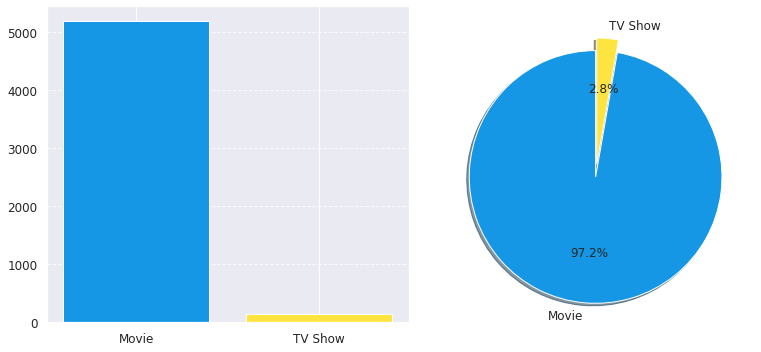

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

types = netflix.type.unique()
types_count = netflix['type'].value_counts()

ax1.bar(types, types_count, color=['#1597E5', '#FEE440'])
ax1.grid(axis='y', linestyle='--', alpha=0.75)
ax1.tick_params(axis='both', labelsize=12)

ax2.pie(types_count, labels=types,
       shadow=True, startangle=90, wedgeprops={'edgecolor':'white'},
       autopct='%1.1f%%', explode=[0.1, 0], colors=['#1597E5', '#FEE440'],
       textprops={'fontsize':12})

plt.tight_layout()

In this output we can see the comparation in two different ways. The first one shows the diviation by quantity, while the second one shows the percentage diviation. It is easy to see that the movies' amount is almost doubled time TV shows'. (Probably if we count TV shows by episodes, and not by seasons, the rate will be upside down...)

# By Addition Date

When a producer wants to release some content, he should do it in a month when least amount of content is added

So in the code below we'll try to check the dates added of the shows divided by months and figure what months are lower in content additions.




findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


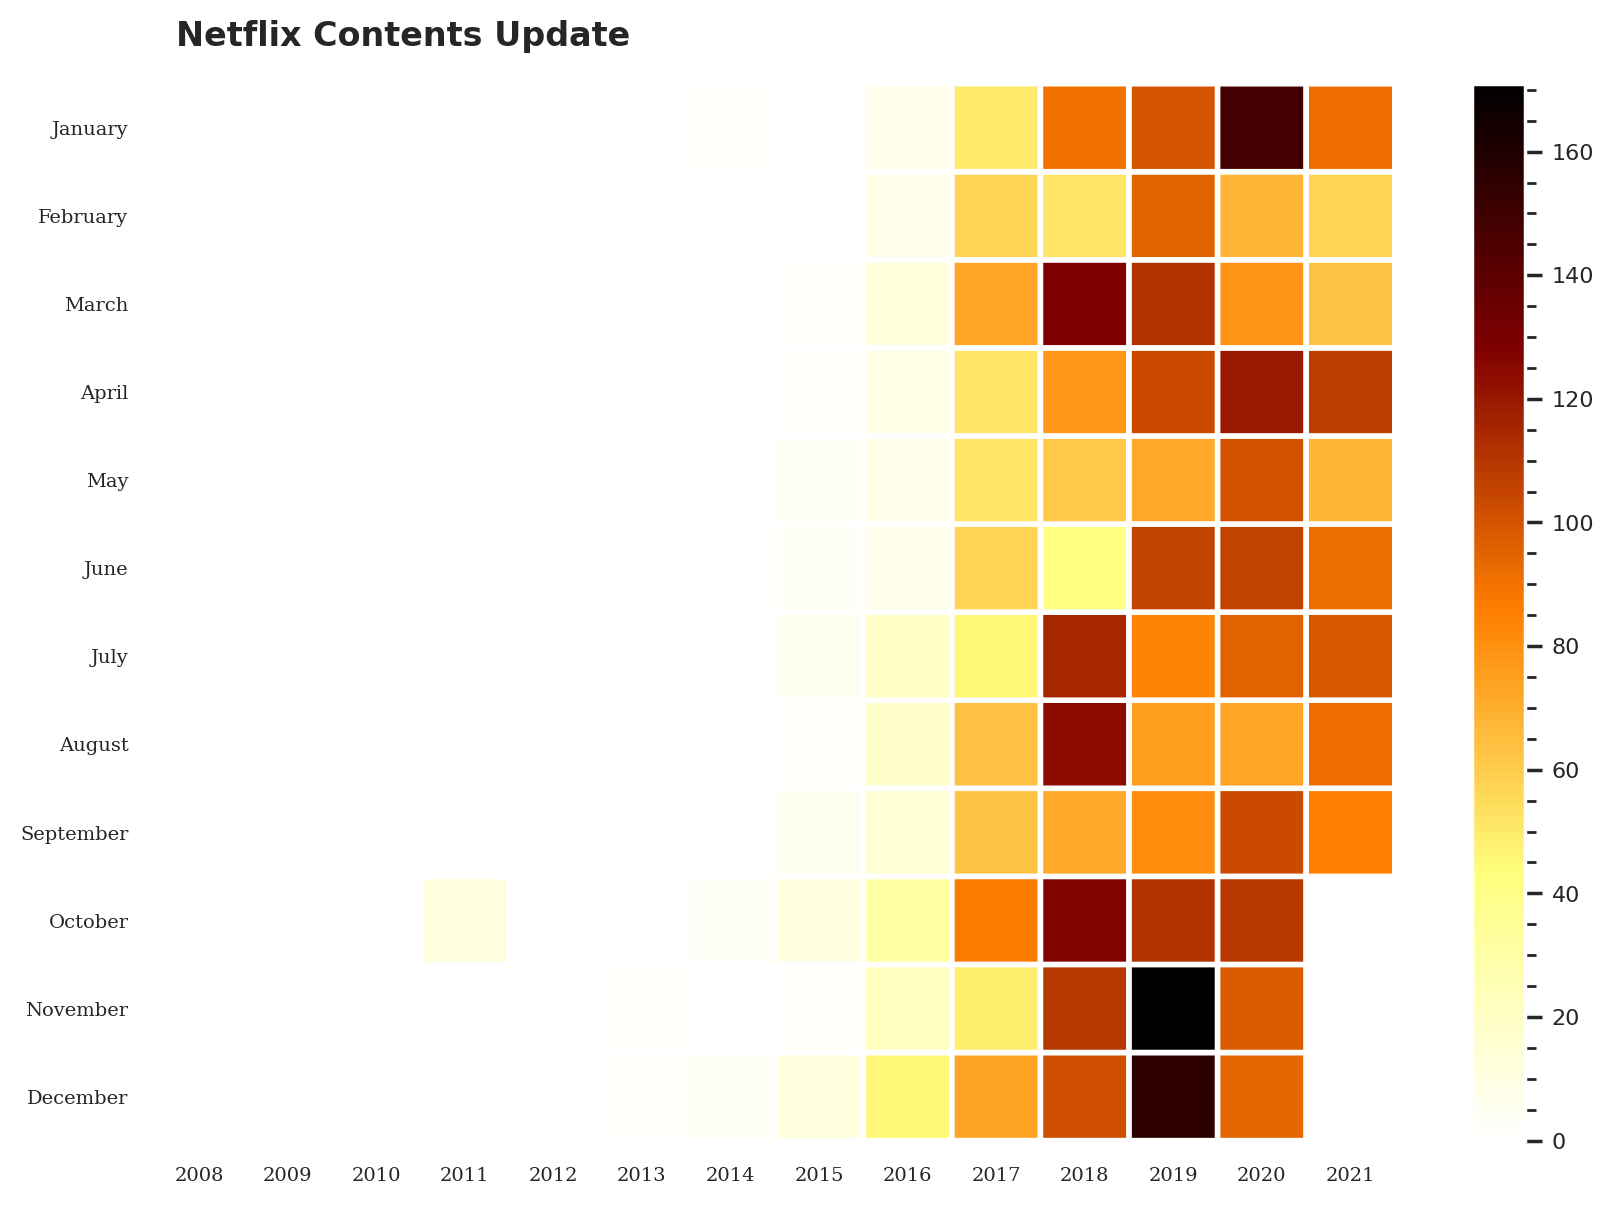

In [ ]:
netflix_date=pd.DataFrame()
netflix_date['year'] = netflix['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In this output every square describes a different month. The month name is written to the left and the year is written bellow. Crossing a month with a year, we can see the density of the content additions of this spasific month. The color of each square is darker accordingly to the density. 
for example we can see that on November 2019 were added to Netflix much more content than the year before, and also more than the same month the year after. (gusse Netflix workers were given higher bonuses then or they just were imbued with motivation in that month...)

# By Country

Let's create graph to exhibit movies data, divided by country

In [ ]:
dfc = netflix['country'].value_counts().sort_values(ascending = False).reset_index().head(10)

fig = px.pie(dfc, values = 'country', names = 'index', 
             color_discrete_sequence = px.colors.sequential.RdBu,
             labels = {"index":"Country", "country":"Count"})
fig.show()

This is a cake graph that shows us diviation by precentage which means each slice's size is accordingly to the country's content on Netflix. Reasonably, the United states' slice is the biggest, also is the biggest country on the list. despite Mexico is about 3.6 times bigger than France, yet its content slice is smaller than France's.

In [ ]:
iso = pd.read_csv('/content/drive/MyDrive/countries_codes_and_coordinates.csv')[['Country','Alpha-3 code']]
df_map = pd.DataFrame()
x = np.hstack([np.array(str(i).split(',')) for i in netflix.country])
unique, counts = np.unique(x, return_counts=True)        
df_map['Country'] = unique
df_map['count'] = counts
df_map = df_map.merge(iso, how='left', on='Country')
df_map['Alpha-3 code'] = df_map['Alpha-3 code'].apply(lambda x:str(x)[2:-1])

fig = go.Figure(data=go.Choropleth(locations=df_map['Alpha-3 code'],
                                    z=df_map['count'].astype(float),
                                    colorscale='viridis',
                                    text=df_map['Country'],
                                    marker_line_color='black',
                                    colorbar_title = 'number of shows'))

fig.update_geos(projection_type="orthographic")
                
fig.show()

This output shows the content distribution to countries of origin in a more visual way - a shape of a globe. The region color indicates to the content quantity that was produced there. 
To create the graph we used a csv that contains coordinates on which the globe is composed.
The legend map to the right explains the meaning of the colors, the range of content that each color represent. 

# By Rating

Let's create graphs to exhibit the content data, divided by rating. The first one is for movies and the other one is for shows.

In [ ]:
movie_df = netflix[netflix['type'] == 'Movie']
show_df = netflix[netflix['type'] == 'TV Show']

colors1 = ['FireBrick', 'Salmon', 'IndianRed','Pink','PapayaWhip']
colors2 = ['CadetBlue', 'LightSteelBlue', 'RoyalBlue','DarkCyan', 'Thistle']

fig = make_subplots(rows = 1,cols = 2,specs = [[{"type": "pie"},{"type": "pie"}]])

fig.add_trace(go.Pie(values = movie_df.value_counts(), labels= movie_df['rating'],
                     marker_colors=colors1),row= 1, col =1)

fig.add_trace(go.Pie(values = show_df.value_counts(), labels= show_df['rating'],
                     marker_colors=colors2),row= 1, col =2)

fig.update_traces(textposition = 'inside', hole = 0.5, hoverinfo = 'label+percent+name')
fig.update_layout(title_text = 'Rating distribution by Type of content',
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'Darkred'),
                  annotations = [dict(text='Movies', x=0.18, y=0.5, font_size=16, showarrow=False,
                                      font_color = 'DarkSlateBlue'),
                                 dict(text='TV Shows', x=0.85, y=0.5, font_size=16, 
                                      showarrow=False,font_color = 'DarkSlateBlue')])

fig.show()

These are also cake graphs that show us diviation by precentage which means each slice's size is accordingly to the rating of movie or show on Netflix. We can see that the precentage amount of the TV shows classified TV-MA is much bigger than the movies precentage at the same classification but both of themare the biggest slice in the pie charts.  Another interesting note,
we can see that movies are splited to much more rating classification than TV shows.

**Let's focus a little bit on the "rating" column.**

In [ ]:
netflix['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'Unknown'],
      dtype=object)

This output specify the age classification defined by the variables.

In [ ]:
netflix['age_group'] = netflix['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
netflix['age_group'] = netflix['age_group'].map(MR_age)

Let's translate the data to a visual shape that shows the obvious differences between the comtent amount's in each age category. 

In [ ]:
order_r = netflix['rating'].value_counts().index[:17]

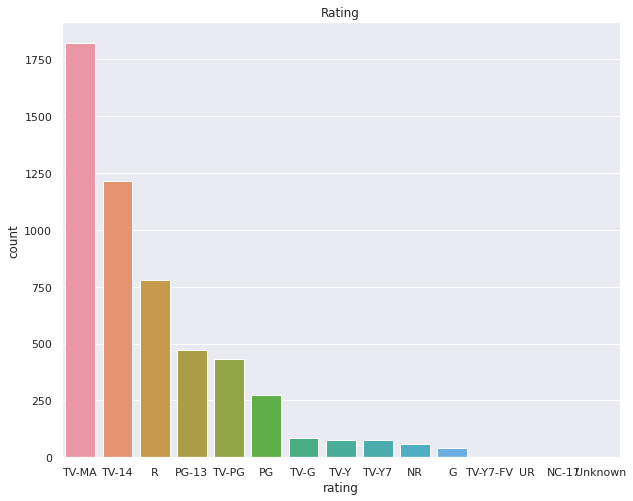

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(netflix["rating"] , order=order_r)
plt.title("Rating");

This is a column graph in which the categories are orgenized due to the values. We can see that Netflix is mostly focused on adults' content (right economic consideration... moreover, it is easy to find free content for the younger ages online) and most of the shows and movies have TV-MA classification.

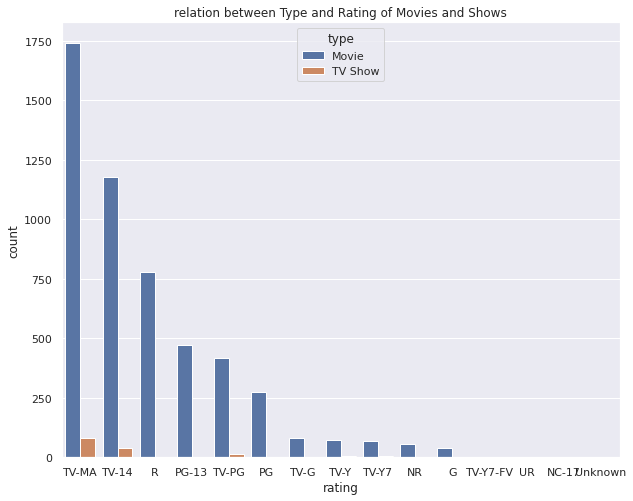

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x= "rating" , hue="type" , data=netflix ,order=order_r)
plt.title("relation between Type and Rating of Movies and Shows");

If we specify the previous graph and differeniate the content to movies and TV shows, we can get better idea about the content type that matches a certain age group. 

# By Releasing Date

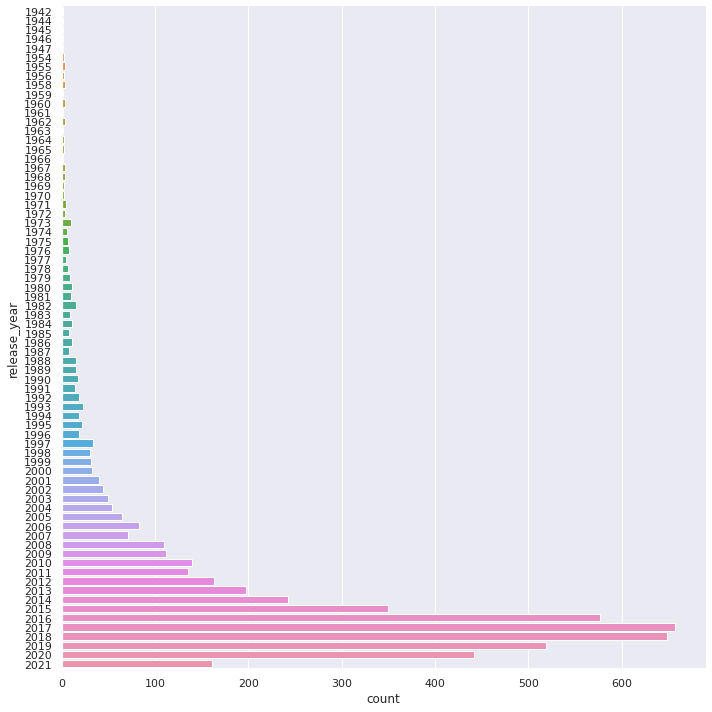

In [ ]:
sns.catplot(y='release_year', kind='count', data=netflix, height=10)

In this putput we can see the diviation of the movies by releasing year. We can see a major raise of the content released every year. There were some deflections over the years in which there were less releasings than the year before but the general tendency is up.

---



In [ ]:
content_by_month = netflix.query('month_added != "No" & month_added != ""')\
.groupby('month_added').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content', ascending = False)

fig = px.pie(labels = content_by_month['month_added'], values = content_by_month['content'], names = content_by_month['month_added'],
            width = 550, height = 550)

colors = ['#6e1919', '#781c1c', '#821f1f', '#871f1f', '#8c2020', '#962121', '#9e2121', '#ab2020', '#b31e1e', '#bf1f1f', '#c91c1c', '#d61818']
fig.update_traces(hoverinfo = 'label + percent', textfont_size = 10,
                  textinfo = 'label + percent', pull = [0.065, 0.06, 0.055, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.015],
                  marker = dict(colors = colors[::-1], line = dict(color = 'white', width = 1)))
fig.update_layout(showlegend = False)

fig.show()

In this output every slice describes a different month. The data about the month applies to this specific month weighted from all the years.  The color of each slice is lighter accordingly to the percentage. 
For example we can see that on July were released the biggest amount of content. It makes sense consider the fact that July is whem the summer vacation beggins and the demand for movies is growing up. Another example, February is the darkest slice which means the least content is released usually this time of the year. It is understantable, as february is testing period in schools and universities and people are too busy to watch.

# By Duration

We measure differently the length of movies and shows, movies are by moments, and shows are by seasons number. Due to it, we saparate them refer to each one singly.

TV shows duration:

In [ ]:
netflix_shows['duration'] = netflix_shows['duration'].astype(int)
netflix_shows['season_count'] = netflix_shows.apply(lambda x : x['duration'] if  x['duration']<20 else "", axis = 1)

# image
import urllib.request
from PIL import Image

# plot
trace = go.Histogram(
                     x = netflix_shows['season_count'],
                     marker = dict(color = 'rgb(249, 6, 6)'))
layout = go.Layout(template= "plotly_dark", title = 'Seasons of TV Shows', xaxis = dict(title = 'No. of Seasons'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In this output every bar represent the amount of TV shows that have certain number of seasons. We can see that most of the shows have only one seasons, while only few have more than one. It can be explained by the financial cause, because unless it’s a show that Netflix owns outright they have to pay to keep it on their service.
So they only keep ones that are being watched enough to justify the cost of the license.‏


Movies duration:

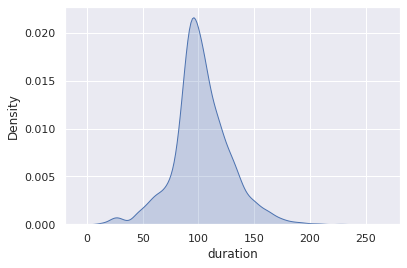

In [ ]:
sns.set(style='darkgrid')
sns.kdeplot(netflix_movies['duration'], shade=True)

In this output there is distribution of the Netflix movies duration. The pick of the graph is between the values 75-120 which shows us that the average movie length is not longer than two hours. That is a smart decision of Netflix that matches the audience expectation. New YouGov research supports this. They conducted a survey that reveals that 55% of British people say the ideal movie is under two hours long, with the most popular running time between an hour and a half and two hours.  ‏
(YouGov is a British international Internet-based market research and data analytics firm.)


In [ ]:
fig = px.violin(netflix_movies, x='duration', box=True, points="all", labels={'duration':'duration (in mins)'})
fig.show()

This output shows the same data in more visual way. Each point refers to a movie so that the most density area is between 75-120. The violin shape above showa the bigger picture. It shows the movies as a group rather than distinct points.

# By Categories

In [ ]:
genres = list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
        
g = Counter(gen)

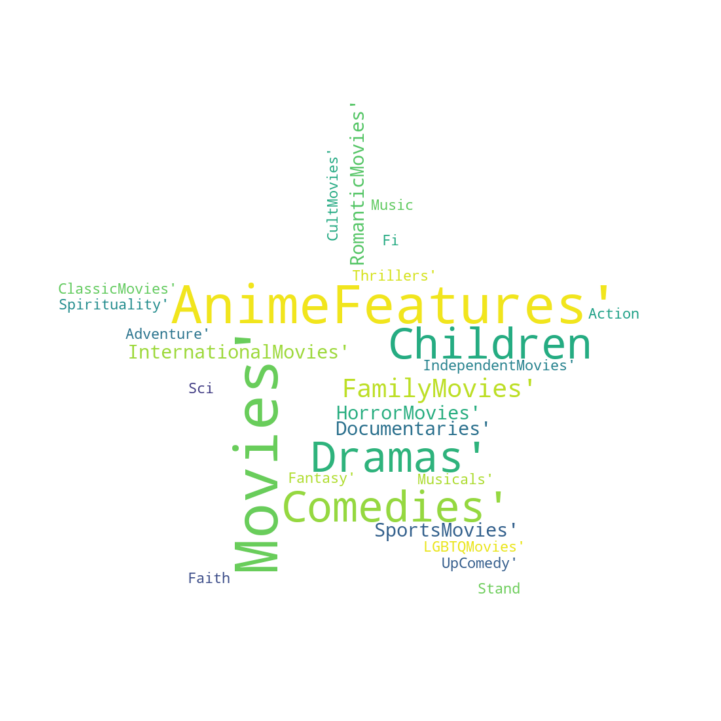

In [ ]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
mask = np.array(Image.open('/content/drive/MyDrive/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white",mask=mask).generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

This is a star output that contain the names of the categories variety. It is more to get a clue about the genres, rather than giving us details about them, so the sizes and the colors don't refer to any distribution. 

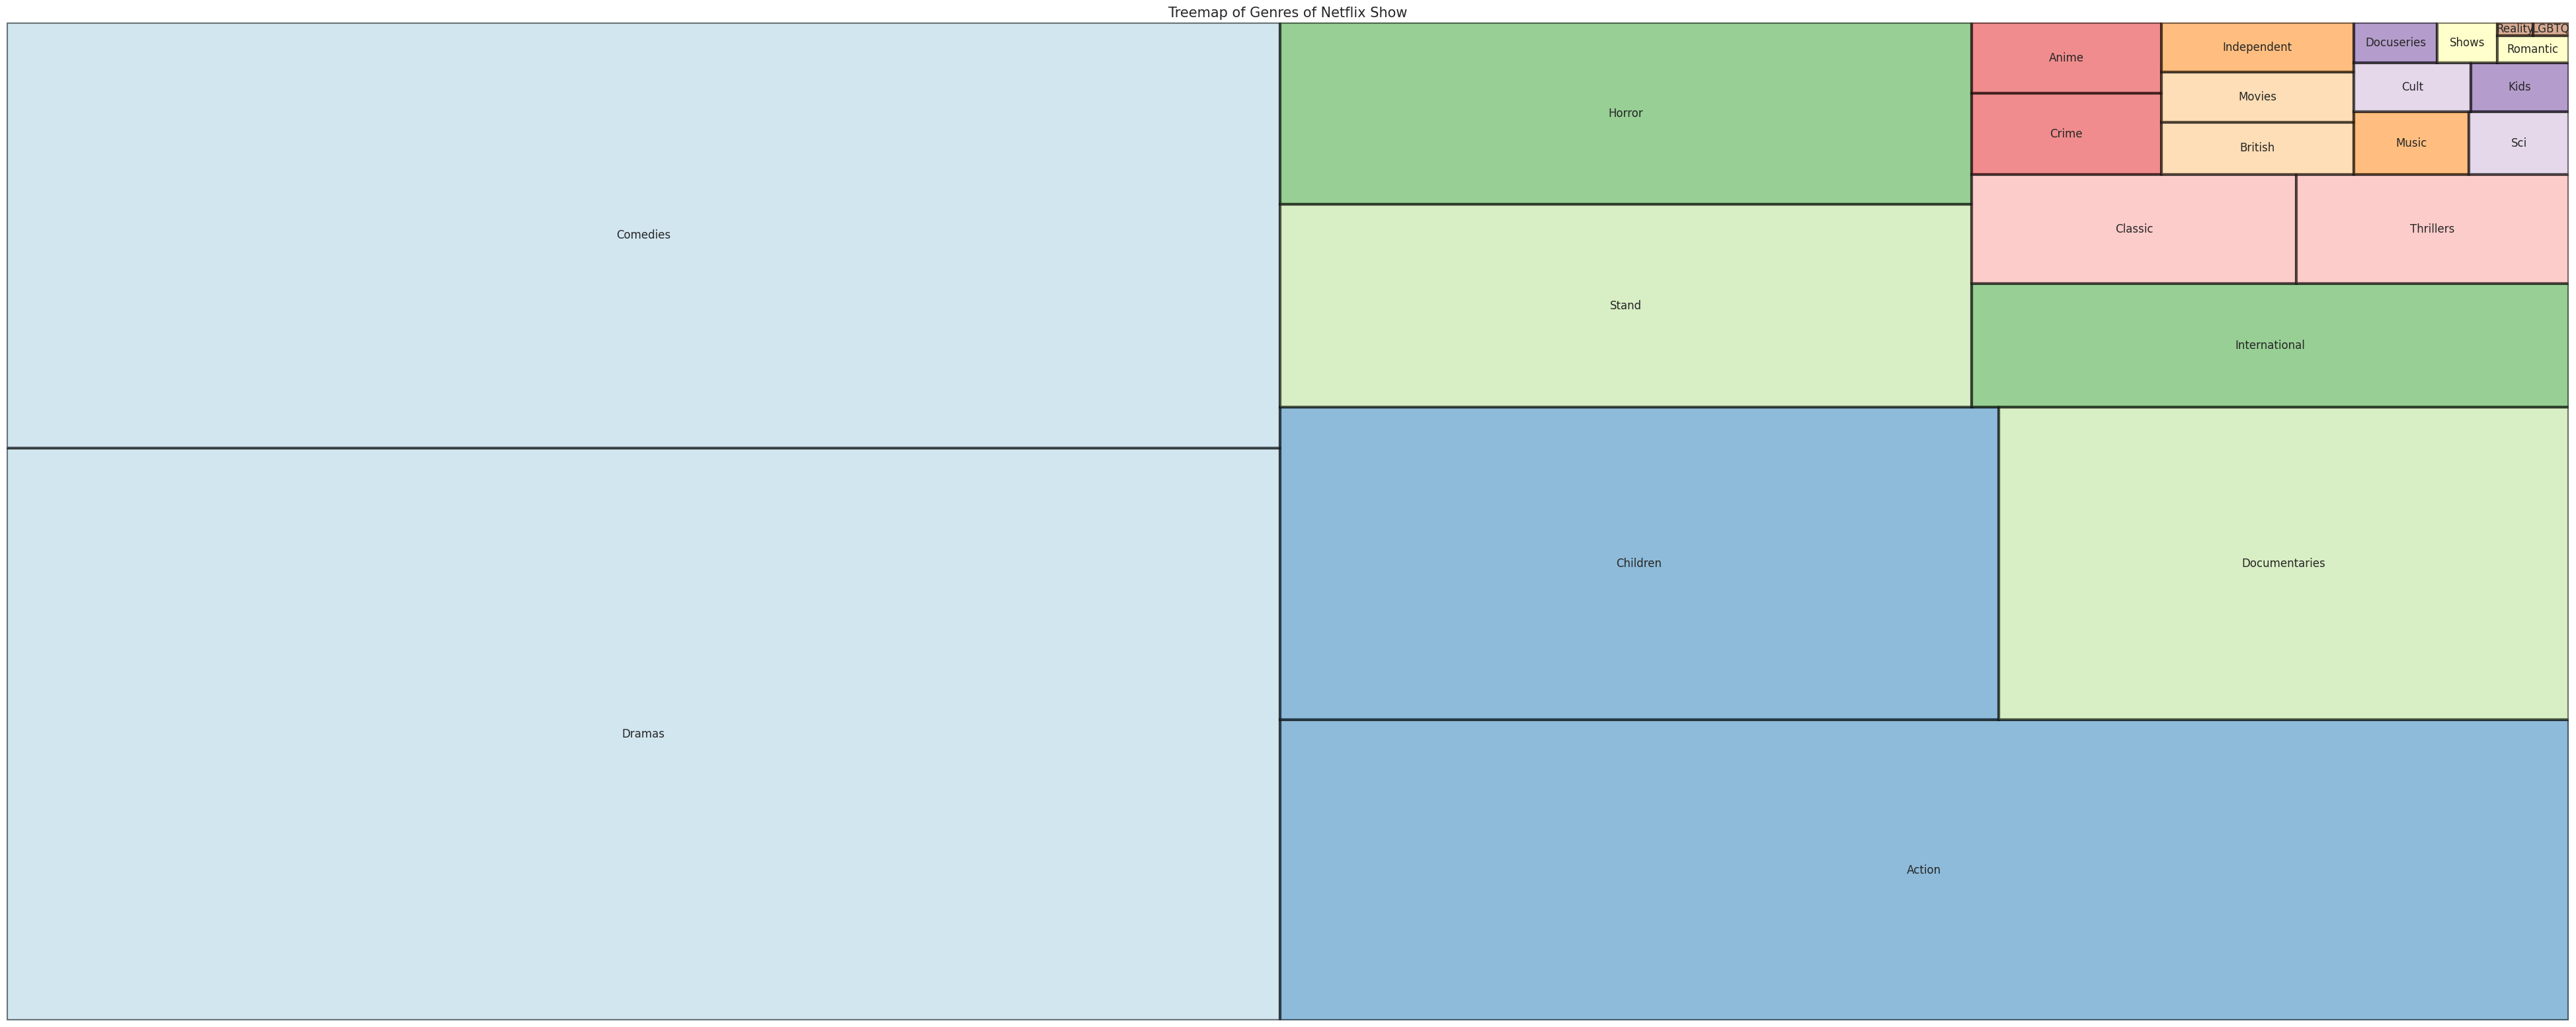

In [ ]:
netflix['Genres'] = netflix['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
temp_df = netflix['Genres'].value_counts().reset_index()

sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(50,20), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':12})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()

Netflix has a lot of categories to define and sort the genre of TV shows and movies. Here we present the correlation between the categories. Each squear shows a different genre and its size is respective to its percntages in Netflix. As we can see one of the largest squears is the comedies category. This is very reasonable why people watch comedy movies, they want to be entertained. Recipients like to do be entertained because they want to relax and try to escape from reality. A lot of people have a stressful life, and they need time to rest and to calm down. SO, they try to escape from their hectic life by watching amusing stories. 


Text(0.5, 1.0, 'Genres')

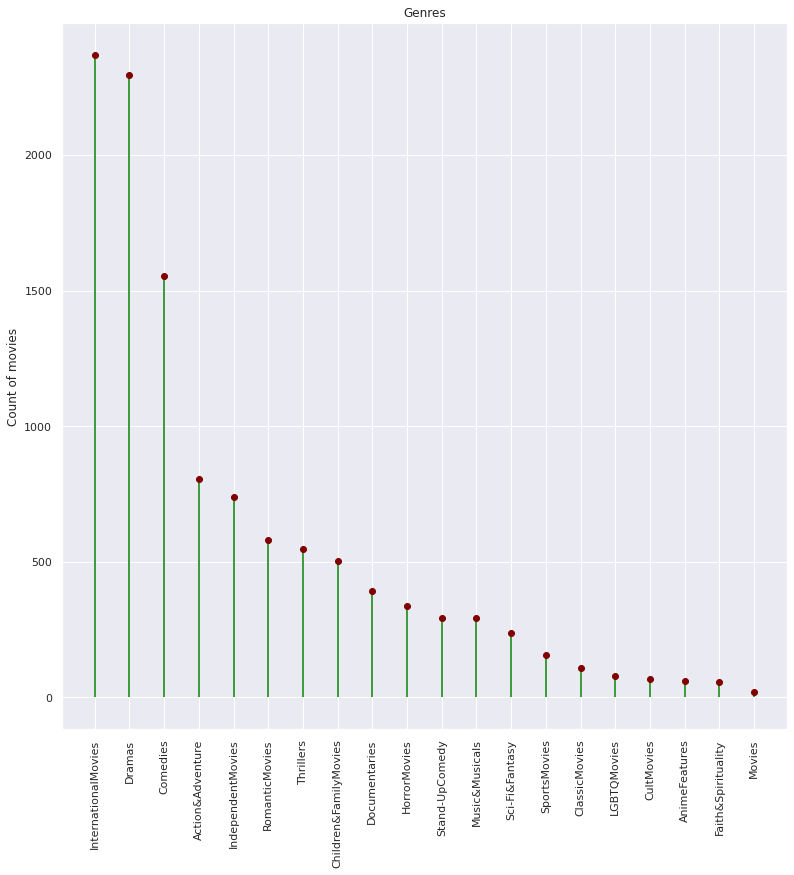

<Figure size 720x720 with 0 Axes>

In [ ]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres")

In the graph below we can see a distribution of the categories as a lollypop plot. The length of the lollypop stick matches the amount of content in the category. For example the stick of faith&spirtuality's lollypop is short because there is not a lot of content in this genre. There is a reason why the industry of this genre is so low. "From our experiences marketing to faith-based communities, we believe that moviegoers searching for appropriate entertainment don’t exist independent from the mainstream,” says Adam Fogelson, Universal’s president of marketing and distribution. “In fact, they are the mainstream and depend on traditional marketing to inform decisions about which films seem right for themselves and their families.”
So it is not worthy investing in this field.

#**A deeper look**

Now that we are closely familiar with the data, let's dive deeper into the project.
We will get conclusions and analyze the relationship between different data.


# Top 10 Combined Categories

In [ ]:
values_categories =  netflix['listed_in'].value_counts()[:10].tolist()
labels_categories = netflix['listed_in'].value_counts()[:10].index.tolist()

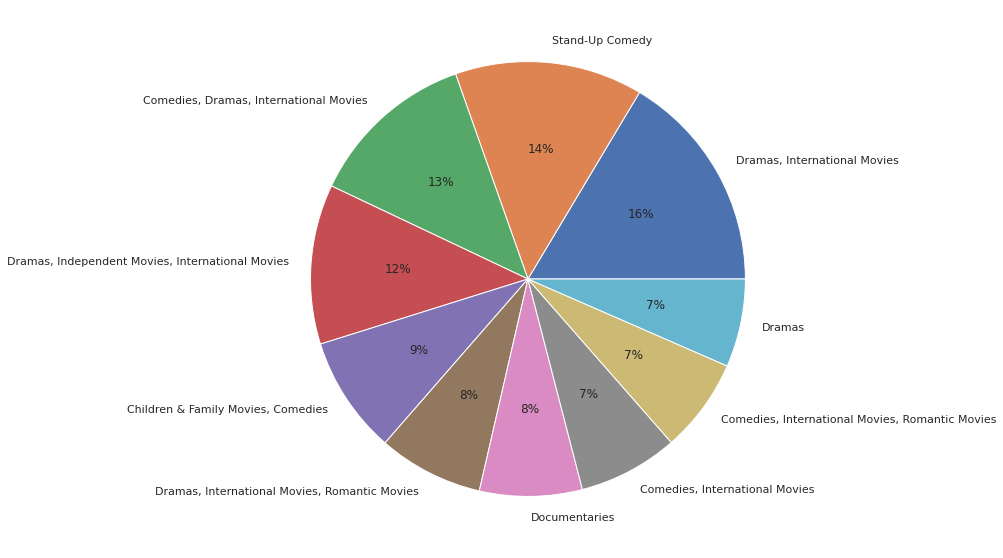

In [ ]:
plt.figure(figsize=(10,10))
top_categories = netflix['listed_in']
top2 = top_categories.value_counts().head()
plt.pie( values_categories , labels=labels_categories , autopct='%1.0f%%' );

In this output we can see the most ten common combinations of this categories. Dramas, international movies is the most popular categories in Netflix. It easy to notice that 'international movies' dosn't stand for itself but combine with other categories.
‏


# Top 10 Actors

In [ ]:
cast_df = netflix['cast']

In [ ]:
casts = [cast for i in cast_df for cast in i.split(',')]
casts_unique = list()

for cast in casts:
    if cast not in casts_unique:
        casts_unique.append(cast)
        
records = list()

for cast in casts_unique:
    cast_count = casts.count(cast)
    records.append([cast_count, cast])

records.sort(reverse=True)

In [ ]:
top10_casts = [i for i in records[:10]]
for cast in top10_casts:
    cast[1] = ' '.join(cast[1].split())

top10_casts.sort(reverse=False)

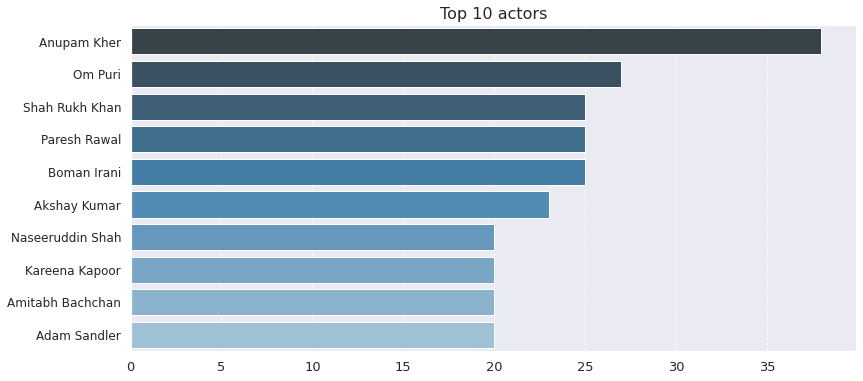

In [ ]:
plt.figure(figsize=(13,6))

sns.barplot(y=[name[1] for name in top10_casts], x=[count[0] for count in top10_casts], palette='Blues_d')
plt.title('Top 10 actors', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.75)
plt.gca().invert_yaxis()

In this output we get to know who are the most common actors on Netflix, and in how many movies and TV sows each one shows up.
Let's pay attention to the intersting fact that seven out of the ten names are indian actors and actresses, this is intresting but not surprising if we consider the following facts. One of the most powerfull media industrial cities in the world is Bollywood, the eastern Hollywood. As it can be understood, Hollywood was the insperation for the indian city name. But in the last years Bollywood surpasses the original city and produces 42% content more than Hollywood. Altogether,  the amount of indian actors is tiny in proportion to the content they produce, which demands to use the same actors for verious rolls in parallel. Netflix supllies content from all over the world. Even if they would have brought the same amount of content from Bollywood and Hollywood, the actors that play in the biggest part of content were indian, let alone taking in consideration that Bollywood produces more content than Hollywood. 

# Top 10 Rated Movies on Netflix

In this part of the project we are going to use IMDB data. IMDb (an acronym for Internet Movie Database) is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. IMDb began as a fan-operated movie database on the Usenet group "rec.arts.movies" in 1990, and moved to the web in 1993. It is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon. (Vikipedia) We are using selected data frome IMDB website which includes information about our data.

In [ ]:
imdb_ratings=pd.read_csv('/content/drive/MyDrive/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('/content/drive/MyDrive/IMDb movies.csv', usecols=['title','year','genre'])

We loaded two csv files. The 'ratings' file contains all the voted rating about the movies in the website, And the 'movies' file contains all the details of each movie. The key column relates the two files is the title column.


In [ ]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                       'Release Year':imdb_titles.year,
                       'Rating':imdb_ratings.weighted_average_vote,
                       'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'],inplace=True)
ratings.shape

(85852, 4)

In this step we created a new data frame with four columns. Rating column with the weighted average vote from the 'rating' file, Title, Release Year, and Genre columns taken from 'movies' file. The output is the shape of the resulting data frame - 4 columns and 85852 lines.


In [ ]:
joint_data = ratings.merge(netflix, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

Now after droping the nulls we get the content that has both ratings on IMDB and are available on Netflix.

After a data sort it's easy to get the top 10 rated movies on Netflix 

In [ ]:
top_rated = joint_data[0:10]
fig = px.sunburst(top_rated,path =['title', 'country'],values='Rating', color='Rating')
fig.show()

In this output we can see the names of the 10 top rated movies in the inner circle, and their source countery and the outer circle. The graph legend is to the right exhibits the rating by colors. When pointing at a slice more data about the movie is shown up.



# Top 5 Years

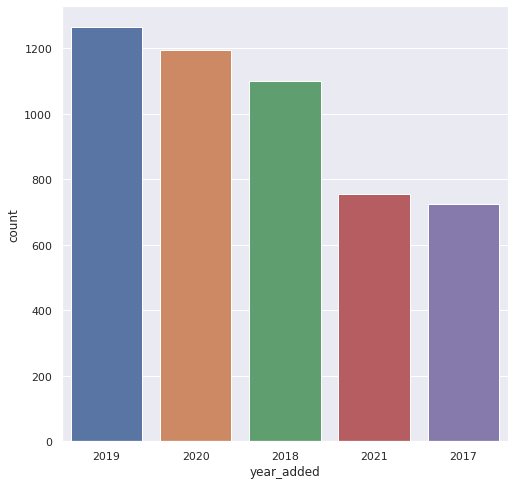

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = netflix["year_added"] , order=netflix['year_added'].value_counts().index[:5]);

In this output we can see a columns graph in which the years are orgenized by the amount of content that was added the year. The bigger is to the left. 

# Distribution of Content Released Relative to Content Created

In [ ]:
released_year_df = netflix.loc[netflix['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = netflix.loc[netflix['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

In this output the orange lines refer to the amount of movies and Tv shows that were added to Netflix by the years. The green ones refer to the amount of movies and Tv shows that were released wroldwide by the years. 
*   The biggest amount of movies were released in 2017.
*   The biggest amount of TV Shows were released in 2020.
*   The biggest amount of movies were added to Netflix in 2019.
*   The biggest amount of TV Shows were added to Netflix in 2020.

From the graph it's clear that in the beginning Netflix added less content than what was published this years but in the last 8 years they started to get in to the business untill in 2017 they reached the amount of content that was created around the wrold and by now every year they add a massive amount of movies and TV shows.







# Covid Impact on the Media Industry


In [7]:
TVshows = netflix[netflix['type'] == 'TV Show']
Movie = netflix[netflix['type'] == 'Movie']

In [8]:
TVshows_progress = TVshows['release_year'].value_counts().sort_index()
Movie_progress = Movie['release_year'].value_counts().sort_index()

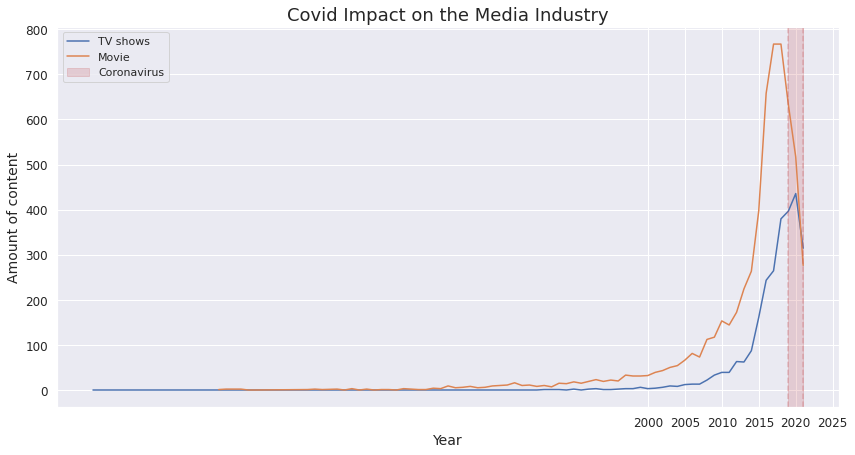

In [9]:
plt.figure(figsize=(14, 7))

plt.plot(TVshows_progress.index, TVshows_progress.values, label='TV shows')
plt.plot(Movie_progress.index, Movie_progress.values, label='Movie')

plt.axvline(2019, alpha=0.3, linestyle='--', color='r')
plt.axvline(2021, alpha=0.3, linestyle='--', color='r')
plt.axvspan(2019, 2021, alpha=0.2, color='r', label='Coronavirus')

plt.xticks(list(range(2000, 2026, 5)), fontsize=12)
plt.title('Covid Impact on the Media Industry', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of content', fontsize=14)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(TVshows_progress.index, TVshows_progress.values, label='TV shows')
plt.plot(Movie_progress.index, Movie_progress.values, label='Movie')

plt.axvline(2019, alpha=0.3, linestyle='--', color='r')
plt.axvline(2021, alpha=0.3, linestyle='--', color='r')
plt.axvspan(2019, 2021, alpha=0.2, color='r', label='Coronavirus')

plt.xticks(list(range(2000, 2026, 5)), fontsize=12)
plt.title('Covid Impact on the Media Industry', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of content', fontsize=14)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

We already saw content growth throughout history, but here we take in consideration the impact of the corona  virus. We can see huge deterioration in the media industry. The Globes Global Statistics Center provides a simple explanation for this - many productions got stuck due to the various restrictions and the spread of the corona and new productions did not start at all due to the economic uncertainty.‏


# Top 10 Directors

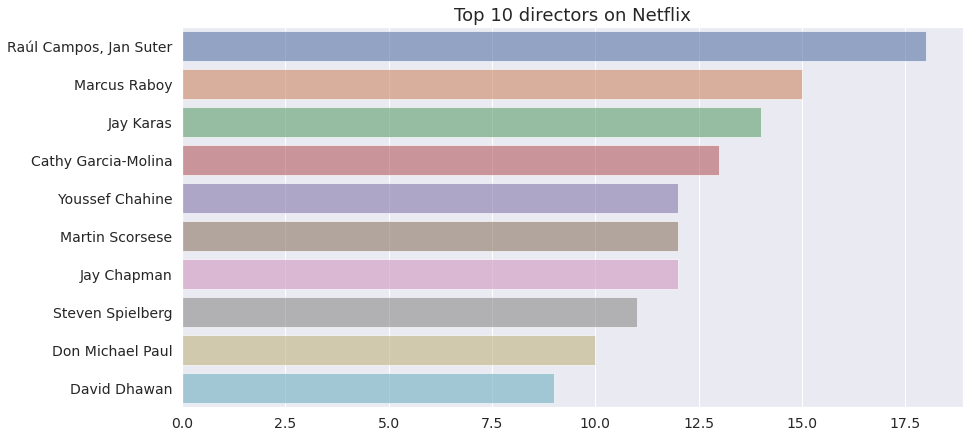

In [ ]:
directors = netflix['director'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Top 10 directors on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=directors.index[:10], x=directors.values[:10], alpha=0.6)

plt.show()

In this output we get to know who are the most common directors on Netflix, and in how many movies and TV sows each one shows up.
The algorithm we used tested who are the ten top directors according to the quantity of content they directed. 'Screen Rant', a farm content website, define the top ten directors according to a different algorithm. But we can see that they both have parallelity such as Martin Scorsese and Steven Spielberg.  

# How Much Netflix content is based on books

In this part of the project we are using a csv that contains books data.  

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/books.csv')


In [ ]:
books['original_title']

0                                        The Hunger Games
1                Harry Potter and the Philosopher's Stone
2                                                Twilight
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
                              ...                        
9995                                           Bayou Moon
9996                                     Means of Ascent 
9997                                The Mauritius Command
9998    Cinderella Ate My Daughter: Dispatches from th...
9999                                  The First World War
Name: original_title, Length: 10000, dtype: object

This output shows the csv's titles of the books. We can see that its length is 10,000.

In [ ]:
books['original_title'] = books['original_title'].str.lower()
x = netflix.copy()
x['title'] = x['title'].str.lower()
netflix_books = x.merge(books, left_on='title', right_on='original_title', how='inner')

We crossed the datasets based on the title column and merged them into  a new dataframe, netflix_books. 
The following graph exhibits the amount of the movies based on books (from netflix_books dataframe) compared to the amount of the independent movies, which are not based on books (from netflix dataframe). 

In [ ]:
labels = ['Content based on books', 'Independent content']
values = [netflix_books['title_x'].size,x['title'].size-netflix_books['title_x'].size]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

This output shows that 4.5% of the content in Netflix is based on books.This is a serious amount, and teaches us that studio executives are risk adverse. Best selling books prove that there's an audience already willing to pay for that content vs. an original screenplay by an unknown writer. On the other side, they don't make much more than these percentages because the audience also wants to watch new content, and not to repeat the known plots, as good as they may be.

# **Models**

# Recommendation System

When people watch movies and enjoy them, they want to continue watching similar content. To keep they costumers satisfied, Netflix has to fill this will. 
So in the following code we build a system that gives recomndation according to the content the user has watched priviously. The system uses TF-IDF.

*The* TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

During the project we analyzed the dataset of movies and series available on Netflix, and saw different possible divisions of this content. Based on the information we deduced from the analysis, we can predict what content the user might like. The following four models analyzed the film or series the viewer saw, for example: What is the content? The genre? Age range? the language? And other characteristics of the content viewed; And located 10 additional movies or series that included as many features that fit the same categories, and therefore the user is likely to enjoy them as well. These models upgrade the user experience and ensure that Netflix audiences are satisfied.Each of these models is slightly different. We entered 3 names and received the appropriate recommendations from each model.

The following model is based solely on the description category, and brings the user recommendations for content based on similarity in that category.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming
# the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#O/p the shape of tfidf_matrix
tfidf_matrix.shape

(5333, 14298)

In [ ]:
#Linear Kernel

#Cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(netflix.index, index = netflix['title']).drop_duplicates()

In [ ]:
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return netflix['title'].iloc[movie_indices]

3 examples of the recomendation system output:
Recommendation based on Life as we know it‏:


In [ ]:
get_recommendation('Life as We Know It')

7162    Kabali (Hindi Version)
5685              Other People
4611                    Vettai
2986          Sillu Karuppatti
1293             Pitta Kathalu
5228     Barakah Meets Barakah
2434               Let's Dance
3872      Knock Down The House
8167      Terminator Salvation
5255        Our Souls at Night
Name: title, dtype: object

Recommendation based on A Cinderella Story‏:

In [ ]:
get_recommendation('A Cinderella Story')

7537     My Honor Was Loyalty
786         Company of Heroes
5581    The Butterfly's Dream
1511          Mohamed Hussein
8291            The Exception
743                Copenhagen
2365      Alexandria ... Why?
6933        Harry and Snowman
3223                 Defiance
5469                  Rangoon
Name: title, dtype: object

Recommendation based on Riverdale:

In [ ]:
get_recommendation('Riverdale')

3836      In Family I Trust
5778                 Umrika
2074                Soldier
7190         Kia and Cosmos
1741             Miss India
6436          Celluloid Man
4812                    TAU
273           Gone for Good
2863    There Will Be Blood
1187       Deadly Illusions
Name: title, dtype: object

The model works well, but is not very accurate. Therefore, we add more metrics to the model to improve it.

The following model is based on the categories Title, Cast, Director, Listed in; And brings to the user recommendations for content based on similarity in these categories.

In [ ]:
factors=netflix.copy()

We transform all the letters to lower case

In [ ]:
def clean_data(x):
    return str.lower(str(x).replace(" ",""))

In [ ]:
#Features on which the model is to be filtered
features=['title', 'director', 'cast', 'listed_in', 'description']
factors=factors[features]

In [ ]:
for feature in features:
    factors[feature] = factors[feature].apply(clean_data)


We creat a "soup" or a "bag of words" of all the rows

In [ ]:
def create_soup(x):
    return x['title']+ ' '+ x['director']+ ' '+ x['cast']+ ' ' + x['listed_in']+ ' ' +x['description']

In [ ]:
factors['soup'] = factors.apply(create_soup, axis=1)

From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [ ]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(factors['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
factors = factors.reset_index()
indices = pd.Series(factors.index, index=factors['title'])

In [ ]:
def get_recommendation_new(title, cosine_sim=cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return netflix['title'].iloc[movie_indices]

The 3 former example of the system's output, now according to the upgraded one. 
Recommendation based on Life as We Know It:

In [ ]:
get_recommendation_new('Life as We Know It', cosine_sim2)

1240                 Safe Haven
4907                  Candy Jar
8323          The Good Catholic
2294                 Desperados
4037         Nappily Ever After
6017                     5 to 7
1739    Christmas with a Prince
2146           The Lost Husband
8607              Tortilla Soup
6257                Be Somebody
Name: title, dtype: object

Recommendation based on A Cinderella Story‏:

In [ ]:
get_recommendation_new('A Cinderella Story', cosine_sim2)

1576                   Bobbleheads The Movie
3188      A Cinderella Story: Christmas Wish
2185          Latte and the Magic Waterstone
6748                              Figaro Pho
7513               Motu Patlu: King of Kings
6550                          Daddy Day Care
3820                          PATRICK (2019)
5189                 Pettersson and Findus 2
1024                  Arlo the Alligator Boy
1507    Shaun the Sheep: The Farmer’s Llamas
Name: title, dtype: object

Recommendation based on Riverdale	:

In [ ]:
get_recommendation_new('Riverdale', cosine_sim2)

3096                             You
273                    Gone for Good
3589                    Sacred Games
8438                The New Romantic
6742                    Father Brown
3036    Jamtara - Sabka Number Ayega
5388                              46
7112                     Jack Taylor
2522               Inhuman Resources
2602    The Forest of Love: Deep Cut
Name: title, dtype: object

We will now hunt for a model for predicting recommended movies according to completely different parameters:

The following model is based on the categories Cast, Director, Country, Rating, Genres; And brings to the user recommendations for content based on similarity in these categories.

In [ ]:
factors=netflix.copy()

In [ ]:
def clean_data(x):
    return str.lower(str(x).replace(" ",""))

In [ ]:
movies = factors[factors['type'] == 'Movie'].reset_index()
movies = movies.drop(['index', 'show_id', 'type', 'date_added', 'release_year', 'duration', 'description'], axis=1)

In [ ]:
tv = factors[factors['type'] == 'TV Show'].reset_index()
tv = tv.drop(['index', 'show_id', 'type', 'date_added', 'release_year', 'duration', 'description'], axis=1)

In [ ]:
actors = []

for i in movies['cast']:
    actor = re.split(r', \s*', str(i))
    actors.append(actor)
    
flat_list = []
for sublist in actors:
    for item in sublist:
        flat_list.append(item)
        
actors_list = sorted(set(flat_list))

binary_actors = [[0] * 0 for i in range(len(set(flat_list)))]

for i in movies['cast']:
    k = 0
    for j in actors_list:
        if j in str(i):
            binary_actors[k].append(1.0)
        else:
            binary_actors[k].append(0.0)
        k+=1
        
binary_actors = pd.DataFrame(binary_actors).transpose()
        
directors = []

for i in movies['director']:
    if pd.notna(i):
        director = re.split(r', \s*', i)
        directors.append(director)
    
flat_list2 = []
for sublist in directors:
    for item in sublist:
        flat_list2.append(item)
        
directors_list = sorted(set(flat_list2))

binary_directors = [[0] * 0 for i in range(len(set(flat_list2)))]

for i in movies['director']:
    k = 0
    for j in directors_list:
        if pd.isna(i):
            binary_directors[k].append(0.0)
        elif j in i:
            binary_directors[k].append(1.0)
        else:
            binary_directors[k].append(0.0)
        k+=1
        
binary_directors = pd.DataFrame(binary_directors).transpose()
        
countries = []

for i in movies['country']:
    country = re.split(r', \s*', str(i))
    countries.append(country)
    
flat_list3 = []
for sublist in countries:
    for item in sublist:
        flat_list3.append(item)
        
countries_list = sorted(set(flat_list3))

binary_countries = [[0] * 0 for i in range(len(set(flat_list3)))]

for i in movies['country']:
    k = 0
    for j in countries_list:
        if j in str(i):
            binary_countries[k].append(1.0)
        else:
            binary_countries[k].append(0.0)
        k+=1
        
binary_countries = pd.DataFrame(binary_countries).transpose()

genres = []

for i in movies['listed_in']:
    genre = re.split(r', \s*', str(i))
    genres.append(genre)
    
flat_list4 = []
for sublist in genres:
    for item in sublist:
        flat_list4.append(item)
        
genres_list = sorted(set(flat_list4))

binary_genres = [[0] * 0 for i in range(len(set(flat_list4)))]

for i in movies['listed_in']:
    k = 0
    for j in genres_list:
        if j in str(i):
            binary_genres[k].append(1.0)
        else:
            binary_genres[k].append(0.0)
        k+=1
        
binary_genres = pd.DataFrame(binary_genres).transpose()

ratings = []

for i in movies['rating']:
    ratings.append(i)

ratings_list = sorted(set(str(ratings)))

binary_ratings = [[0] * 0 for i in range(len(set(ratings_list)))]

for i in movies['rating']:
    k = 0
    for j in ratings_list:
        if j in str(i):
            binary_ratings[k].append(1.0)
        else:
            binary_ratings[k].append(0.0)
        k+=1
        
binary_ratings = pd.DataFrame(binary_ratings).transpose()

In [ ]:
binary = pd.concat([binary_actors, binary_directors, binary_countries, binary_genres], axis=1,ignore_index=True)
binary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,28880,28881,28882,28883,28884,28885,28886,28887,28888,28889,28890,28891,28892,28893,28894,28895,28896,28897,28898,28899,28900,28901,28902,28903,28904,28905,28906,28907,28908,28909,28910,28911,28912,28913,28914,28915,28916,28917,28918,28919
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
actors2 = []

for i in tv['cast']:
    actor2 = re.split(r', \s*', str(i))
    actors2.append(actor2)
    
flat_list5 = []
for sublist in actors2:
    for item in sublist:
        flat_list5.append(item)
        
actors_list2 = sorted(set(flat_list5))

binary_actors2 = [[0] * 0 for i in range(len(set(flat_list5)))]

for i in tv['cast']:
    k = 0
    for j in actors_list2:
        if j in str(i):
            binary_actors2[k].append(1.0)
        else:
            binary_actors2[k].append(0.0)
        k+=1
        
binary_actors2 = pd.DataFrame(binary_actors2).transpose()
        

countries2 = []

for i in tv['country']:
    country2 = re.split(r', \s*', str(i))
    countries2.append(country2)
    
flat_list6 = []
for sublist in countries2:
    for item in sublist:
        flat_list6.append(item)
        
countries_list2 = sorted(set(flat_list6))

binary_countries2 = [[0] * 0 for i in range(len(set(flat_list6)))]

for i in tv['country']:
    k = 0
    for j in countries_list2:
        if j in str(i):
            binary_countries2[k].append(1.0)
        else:
            binary_countries2[k].append(0.0)
        k+=1
        
binary_countries2 = pd.DataFrame(binary_countries2).transpose()

genres2 = []

for i in tv['listed_in']:
    genre2 = re.split(r', \s*', str(i))
    genres2.append(genre2)
    
flat_list7 = []
for sublist in genres2:
    for item in sublist:
        flat_list7.append(item)
        
genres_list2 = sorted(set(flat_list7))

binary_genres2 = [[0] * 0 for i in range(len(set(flat_list7)))]

for i in tv['listed_in']:
    k = 0
    for j in genres_list2:
        if j in str(i):
            binary_genres2[k].append(1.0)
        else:
            binary_genres2[k].append(0.0)
        k+=1
        
binary_genres2 = pd.DataFrame(binary_genres2).transpose()

ratings2 = []

for i in tv['rating']:
    ratings2.append(i)

ratings_list2 = sorted(set(str(ratings2)))

binary_ratings2 = [[0] * 0 for i in range(len(set(ratings_list2)))]

for i in tv['rating']:
    k = 0
    for j in ratings_list2:
        if j in str(i):
            binary_ratings2[k].append(1.0)
        else:
            binary_ratings2[k].append(0.0)
        k+=1
        
binary_ratings2 = pd.DataFrame(binary_ratings2).transpose()

In [ ]:
binary2 = pd.concat([binary_actors2, binary_countries2, binary_genres2], axis=1, ignore_index=True)
binary2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
def recommender(search):
    cs_list = []
    binary_list = []
    if search in movies['title'].values:
        idx = movies[movies['title'] == search].index.item()
        for i in binary.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]    
        for j in range(len(movies)):
            binary_list2 = []
            for k in binary.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        movies_copy = movies.copy()
        movies_copy['cos_sim'] = cs_list
        results = movies_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(10)
        return(top_results['title'])
    elif search in tv['title'].values:
        idx = tv[tv['title'] == search].index.item()
        for i in binary2.iloc[idx]:
            binary_list.append(i)
        point1 = np.array(binary_list).reshape(1, -1)
        point1 = [val for sublist in point1 for val in sublist]
        for j in range(len(tv)):
            binary_list2 = []
            for k in binary2.iloc[j]:
                binary_list2.append(k)
            point2 = np.array(binary_list2).reshape(1, -1)
            point2 = [val for sublist in point2 for val in sublist]
            dot_product = np.dot(point1, point2)
            norm_1 = np.linalg.norm(point1)
            norm_2 = np.linalg.norm(point2)
            cos_sim = dot_product / (norm_1 * norm_2)
            cs_list.append(cos_sim)
        tv_copy = tv.copy()
        tv_copy['cos_sim'] = cs_list
        results = tv_copy.sort_values('cos_sim', ascending=False)
        results = results[results['title'] != search]    
        top_results = results.head(10)
        return (top_results['title'])
    else:
        return ("Title not in dataset. Please check spelling.")

In [ ]:
recommender('Life as We Know It')

4847     The Good Catholic
1083      The Lost Husband
575             Safe Haven
2066    Nappily Ever After
3238                5 to 7
2579             Candy Jar
1166            Desperados
3036              Blue Jay
3771      First Impression
2101             Paddleton
Name: title, dtype: object

In [ ]:
recommender('A Cinderella Story')

758                                 Bobbleheads The Movie
458                                Arlo the Alligator Boy
1102                                           Sugar High
2203          Prince of Peoria: A Christmas Moose Miracle
4668                                Spy Kids 3: Game Over
3514    Bruno and Boots: This Can't Be Happening at Ma...
2993                                               Zapped
1483            Carmen Sandiego: To Steal or Not to Steal
1749                                               Jinxed
3762                                           Figaro Pho
Name: title, dtype: object

In [ ]:
recommender('Riverdale')

81                     Sacred Games
69                              You
128                     Jack Taylor
122                Brave Miss World
2                     Gone for Good
68     Jamtara - Sabka Number Ayega
62     Unabomber - In His Own Words
95                 Age of Rebellion
124                    Father Brown
49                Inhuman Resources
Name: title, dtype: object

We will present another model that is completely different from the previous two models, and in addition it predicts according to other parameters:

The following model is based on the categories Type, Country, Listed_in; and brings the user recommendations for content based on similarity in these categories.

In [ ]:
factors=netflix.copy()

In [ ]:
netflix.set_index('title', inplace=True)

In [ ]:
def clean_data(x):
    return str.lower(str(x).replace(" ",""))

In [ ]:
def get_reccomendation(liked):
        type=factors.loc[liked,'type']
        country=factors.loc[liked,'country']
        genere=factors.loc[liked,'listed_in']

        req=factors[factors['country']==country]
        required=req[req['listed_in']==genere]
        req1=required[required['type']==type]
        return(req1.index.tolist())

In [ ]:
liked='Life as We Know It'
get_reccomendation(liked)[:10]

['Letters to Juliet',
 'Home Again',
 'Life as We Know It',
 'Flipped',
 'The Mirror Has Two Faces',
 'Nappily Ever After',
 '5 to 7',
 'Be Somebody',
 'Sex and the City 2',
 'Sex and the City: The Movie']

In [ ]:
liked='A Cinderella Story'
get_reccomendation(liked)[:10]

['A Cinderella Story',
 'Open Season 2',
 'Open Season: Scared Silly',
 'Rango',
 'Jinxed',
 'The Boy Who Cried Werewolf',
 'Puppy Star Christmas',
 'My Little Pony Equestria Girls: Legend of Everfree',
 'Harriet the Spy: Blog Wars',
 'Mirror Mirror']

In [ ]:
liked='Riverdale'
get_reccomendation(liked)[:10]

['Riverdale',
 'Dirty John',
 'The Sinner',
 'How to Get Away with Murder',
 '13 Reasons Why',
 'MINDHUNTER',
 'Quantico',
 'NCIS',
 'Somewhere Between',
 'Frequency']

An examination of the recommendations revealed that the most accurate model is the third model, followed by the second, followed by the fourth, and the first model has the most serious deviation and is less suitable. This is reflected, for example, in the fact that for the American drama-comedy film "Life as It Is" the third model presents recommendations for American comedy films whose viewing classification is 13+, whereas the first model presents much more versatile recommendations - comedies across a wide age range and in different languages.

# ***Improvement ideas***

If time would have allowed us we would have dived deeper and added more things, we started by writing a model that identified the genre of the movie according to its description. And we saw that it came out another project on its own and we finally decided to focus on this model and expanded it to several versions.

# **Sources**

**Kaggle**

Such a special, knowledgeable platform that helped us enrich our project, we took from there ideas and examples for clearing data, how to present data, unique libraries to use for visualizations and interesting graphs. A site full of content, worth visiting ...

https://www.netflix.com/

**Netflix**

The official site we worked on all its data, from there we were inspired to work with movies and shows, we could test the accuracy of classifications and models as we entered and examined the content quality of the model results, we visited the site and saw what the data is and enjoyed working on it, enjoy watching!

https://www.kaggle.com/

# **Self reflection**

Here we are at the end, remembering the first few minutes when we just started working on the project. We didn't know where to start, it seemed so big and far from our reach. Then we started figuring out what to do, what topic to choose and what to start writing. When we went deeper and dived into the world of data science, we found out that this is the most interesting topic we encountered throughout our degree (we are almost at the end of it, so this is a solid opinion). We really enjoyed working on the project. It was interesting and challenging, and we touched so many content worlds and topics related to machine learning, artificial intelligence, languages computer. Moreover, we earned soft skills development during the work, that gave us tools for the future, such as dealing with large-scale tasks, expanding development ideas and more. Thanks for the opportunity. We hope you will enjoy our project!
 Signed below, full of satisfaction:
 
**Michal and Tehila**